In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import random

In [3]:
x = random.sample(range(0, 999999999), 1100)
y = []
for i in x:
    y.append(2*i + 12)

In [4]:
print(len(x), len(y))

1100 1100


In [5]:
for i in range(len(x)):
    print(x[i], y[i])

259957125 519914262
840449222 1680898456
888344406 1776688824
391248754 782497520
173607474 347214960
364898609 729797230
637415199 1274830410
320156894 640313800
465522482 931044976
457131053 914262118
10298111 20596234
930169958 1860339928
21615378 43230768
683293490 1366586992
231729601 463459214
826413932 1652827876
295588701 591177414
526937718 1053875448
736015494 1472031000
407786920 815573852
854208533 1708417078
945217160 1890434332
192194267 384388546
75296572 150593156
377264786 754529584
210811725 421623462
194799929 389599870
292089772 584179556
25449251 50898514
26585249 53170510
260016859 520033730
5819020 11638052
649250363 1298500738
675919292 1351838596
388412209 776824430
347286412 694572836
120006847 240013706
592472032 1184944076
415484368 830968748
286993121 573986254
62095326 124190664
627662753 1255325518
540410155 1080820322
423853345 847706702
286784055 573568122
579833822 1159667656
251506968 503013948
561101182 1122202376
597027620 1194055252
810215261 16204

In [6]:
x = np.array(x)
y = np.array(y)

In [7]:
x

array([259957125, 840449222, 888344406, ..., 341711646, 424825580,
       796790173])

In [8]:
u = x.mean()
std = x.std()

In [9]:
std

289876105.1498276

In [10]:
x = (x - u)/std

In [11]:
u_y = y.mean()
std_y = y.std()
y = (y-u_y)/std_y

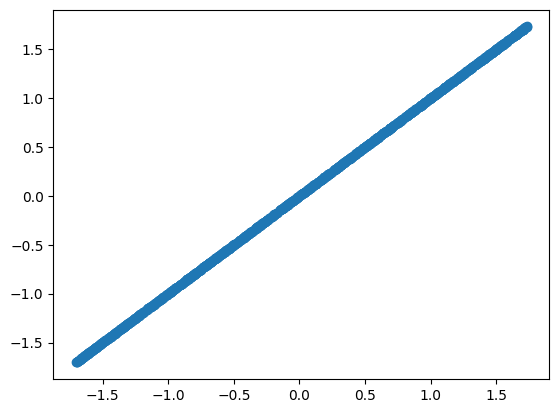

In [12]:
plt.scatter(x, y)

In [13]:
print(x.shape, y.shape, x[0], y[0])

(1100,) (1100,) -0.8140636384506844 -0.8140636384506844


In [14]:
def hypothesis(X, theta):
    y_ = theta[0] + theta[1]*X
    return y_

In [15]:
def cost(X, Y, theta):
    m = X.shape[0]
    
    total_loss = 0
    
    for i in range(m):
        y_p = hypothesis(X[i], theta)
        
        y_gt = Y[i]
        
        total_loss+=(y_p - y_gt)**2
        
    return total_loss/m

In [16]:
def gradient(X, Y, theta):
    m = X.shape[0]
    
    grad = np.zeros((2,))
    
    for i in range(m):
        y_p = hypothesis(X[i], theta)
        
        y_gt = Y[i]
        
        grad[0] += (y_p - y_gt)*1
        grad[1] += (y_p - y_gt)*X[i]
        
    return grad/m

In [17]:
def gradient_descent(X, Y, learning_rate = 0.001, epochs = 100):
    
    theta = np.zeros((2,))
    cost_epoch = []
    
    for i in range(epochs):
        loss = cost(X, Y, theta)
        grad = gradient(X, Y, theta)
        cost_epoch.append(loss)
        
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        
    return theta, cost_epoch

In [18]:
X_train = x[:1000]
Y_train = y[:1000]
X_test = x[1000:]
Y_test = y[1000:]

In [19]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1000,) (100,) (1000,) (100,)


In [20]:
theta, cost_epoch = gradient_descent(X_train, Y_train, learning_rate=0.3, epochs=100)

In [21]:
theta

array([1.2686927e-16, 1.0000000e+00])

In [22]:
cost_epoch

[1.0041336376003682,
 0.49025270455183223,
 0.23937488075463903,
 0.11688730665110428,
 0.05708032402666631,
 0.027876349911644553,
 0.013614944578248644,
 0.006650073283632581,
 0.0032483861735296987,
 0.0015868636998040866,
 0.0007752511615568643,
 0.00037877048206573277,
 0.00018507203392301622,
 9.043499187304333e-05,
 4.41939993860871e-05,
 2.159838399823124e-05,
 1.0556268169736375e-05,
 5.159775680838245e-06,
 2.522217424470196e-06,
 1.2330070337222795e-06,
 6.028093119136606e-07,
 2.9473095166194974e-07,
 1.4411293424581374e-07,
 7.047119178184112e-08,
 3.446289274068698e-08,
 1.6854788561098192e-08,
 8.243779446485168e-09,
 4.03237484473113e-09,
 1.972544930609106e-09,
 9.64993481960077e-10,
 4.721209931799461e-10,
 2.3100090683142477e-10,
 1.1303305810328174e-10,
 5.531318486556125e-11,
 2.706968602434503e-11,
 1.3248572998520655e-11,
 6.484646112792256e-12,
 3.1742030696010597e-12,
 1.5538687642158717e-12,
 7.607204941029138e-13,
 3.7244915265593155e-13,
 1.8236433117872978e

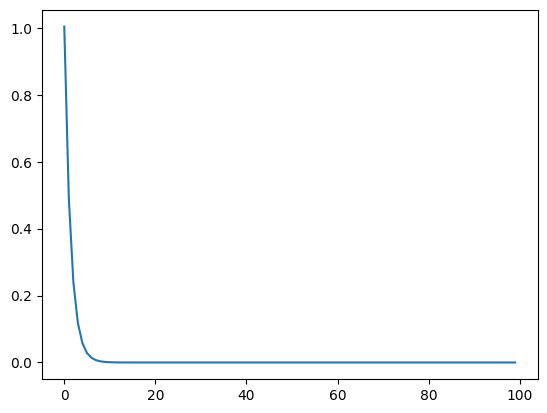

In [23]:
plt.plot(cost_epoch)

In [24]:
y_p = theta[0] + theta[1]*X_test

In [25]:
for i in range(len(y_p)):
    print(y_p[i], Y_test[i])

-1.3975207430388046 -1.397520743038805
-0.19603853456223924 -0.19603853456223944
-1.6553541990298368 -1.6553541990298375
-1.2511025483481366 -1.251102548348137
-0.5903996114813382 -0.5903996114813385
-0.06438479242204243 -0.06438479242204256
0.5719192792939206 0.5719192792939206
1.4285931982140283 1.4285931982140283
-0.7961108444550901 -0.7961108444550904
-0.7660350091409175 -0.7660350091409178
1.1982387715685945 1.1982387715685945
0.9565921482161982 0.9565921482161983
-1.5749498932387362 -1.574949893238737
1.2364237437113617 1.2364237437113617
-0.5643785049948229 -0.5643785049948231
1.424945539848212 1.424945539848212
-1.6736222932463745 -1.6736222932463751
-0.36893987796236055 -0.3689398779623607
0.4852859571474818 0.4852859571474818
1.1267804842796385 1.1267804842796385
-1.0579597297254637 -1.0579597297254641
1.515927133472041 1.5159271334720412
-0.826081652140358 -0.8260816521403583
-0.4259656614137283 -0.42596566141372855
-1.6671594908052016 -1.6671594908052023
1.169036388724294 1

In [26]:
def R2_score(y_t, y_p):
    num = np.sum((y_t - y_p)**2)
    den = np.sum((y_t - y_t.mean())**2)
    
    score = (1 - num/den)
    
    return score

In [27]:
R2_score(Y_test, y_p)

1.0

In [28]:
T0 = np.arange(-50, 50)
T1 = np.arange(-50, 50)
T0, T1 = np.meshgrid(T0, T1)
J = np.zeros(T0.shape)
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_pred = T0[i, j] + T1[i, j]*X_test
        J[i, j] = (np.sum((y_pred - Y_test)**2))/Y_test.shape[0]

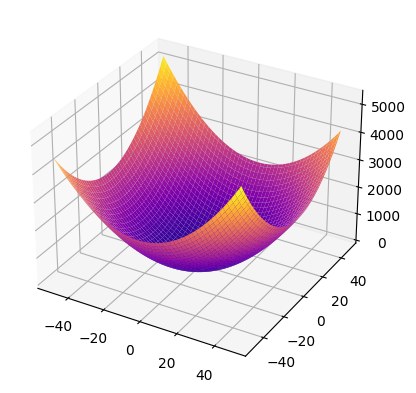

In [29]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(T0, T1, J, cmap = 'plasma')

In [30]:
def gradient_descent(X, Y, learning_rate = 0.001, epochs = 100):
    
    theta = np.zeros((2,))
    cost_epoch = []
    theta_list = []
    
    for i in range(epochs):
        loss = cost(X, Y, theta)
        grad = gradient(X, Y, theta)
        cost_epoch.append(loss)
        
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        
        theta_list.append([theta[0], theta[1]])
        
    return theta, cost_epoch, theta_list

In [31]:
_, cost, theta_list = gradient_descent(X_train, Y_train, learning_rate=0.3, epochs=100)

In [32]:
theta_list = np.array(theta_list)
cost = np.array(cost)

In [33]:
T0 = np.arange(-50, 50)
T1 = np.arange(-50, 50)
T0, T1 = np.meshgrid(T0, T1)
J = np.zeros(T0.shape)
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_pred = T0[i, j] + T1[i, j]*X_test
        J[i, j] = (np.sum((y_pred - Y_test)**2))/Y_test.shape[0]

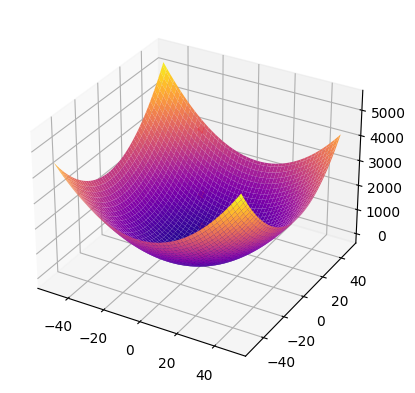

In [42]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(T0, T1, J, cmap = 'plasma')
ax.scatter(theta_list[:, 0], theta_list[:, 1], cost, color = 'red')

In [35]:
len(theta_list[:, 0])

100

In [40]:
print(len(cost))

100


In [39]:
cost = cost*5000

In [38]:
cost

array([1.00413364e+00, 4.90252705e-01, 2.39374881e-01, 1.16887307e-01,
       5.70803240e-02, 2.78763499e-02, 1.36149446e-02, 6.65007328e-03,
       3.24838617e-03, 1.58686370e-03, 7.75251162e-04, 3.78770482e-04,
       1.85072034e-04, 9.04349919e-05, 4.41939994e-05, 2.15983840e-05,
       1.05562682e-05, 5.15977568e-06, 2.52221742e-06, 1.23300703e-06,
       6.02809312e-07, 2.94730952e-07, 1.44112934e-07, 7.04711918e-08,
       3.44628927e-08, 1.68547886e-08, 8.24377945e-09, 4.03237484e-09,
       1.97254493e-09, 9.64993482e-10, 4.72120993e-10, 2.31000907e-10,
       1.13033058e-10, 5.53131849e-11, 2.70696860e-11, 1.32485730e-11,
       6.48464611e-12, 3.17420307e-12, 1.55386876e-12, 7.60720494e-13,
       3.72449153e-13, 1.82364331e-13, 8.92984200e-14, 4.37299068e-14,
       2.14162858e-14, 1.04891551e-14, 5.13768560e-15, 2.51666334e-15,
       1.23285844e-15, 6.03992714e-16, 2.95924203e-16, 1.44997151e-16,
       7.10507309e-17, 3.48183041e-17, 1.70638309e-17, 8.36325270e-18,
      